# Feature Selector - Module Guide

This notebook showcases the usage of the FeatureSelector module.

#### Imports

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

#Import packages/modules
import FeatureSelector as fs

### Generate Sample

In [2]:
#generate sample for classification modelling
X, y = make_classification(n_samples=5000, n_features=100, n_informative=20, scale=None,
                           weights=[0.6], n_redundant=50, n_repeated=5, n_classes=2,
                           shuffle=True)
df = pd.DataFrame(X, columns=['feature_'+str(ii) for ii in range(X.shape[1])])
df['target'] = y

In [3]:
#separate features and values
X_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1]

In [4]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,target
0,-82.704900,299.277289,-350.751746,103.841783,158.452964,1.738499,388.386743,-33.754717,-88.022013,64.729297,...,158.040038,-283.209205,77.415427,27.009071,124.651088,-118.800785,-239.740856,-963.658719,38.328038,0
1,-28.397509,167.661240,171.475094,89.404403,-1219.073676,-30.651444,-227.502864,-36.370192,142.941214,62.975628,...,-80.321862,-655.630881,886.780378,3.198222,-166.281813,-456.178813,-455.027640,285.253159,41.516353,0
2,70.360122,-345.143893,-285.621385,-17.780707,-1638.380683,-3.299392,635.642889,178.633318,71.572735,-71.199320,...,-31.502002,200.406800,584.704684,-123.939417,-203.927326,369.453636,-564.960611,222.184702,-21.796039,0
3,146.774889,21.658901,-211.873149,34.680074,-525.487341,-17.061669,104.856710,189.203886,-115.931664,-225.912656,...,2.099379,-436.883304,-264.449215,-58.171499,162.708432,322.617087,38.952717,29.842302,-149.461379,0
4,129.222627,-219.106189,47.357361,-20.877722,365.041958,-20.431298,117.684478,-67.457811,-14.392053,46.061727,...,11.979582,-54.923312,61.383053,-20.271662,105.053952,-107.021125,-437.879114,-696.199804,35.513453,0


## Apply Transformations

In [5]:
#without combining original data
X_data_tf = fs.transformations(X_data)
X_data_tf.head()

,feature_0_YEO_JON,feature_1_YEO_JON,feature_2_YEO_JON,feature_3_YEO_JON,feature_4_YEO_JON,feature_5_YEO_JON,feature_6_YEO_JON,feature_7_YEO_JON,feature_8_YEO_JON,feature_9_YEO_JON,...,feature_90_YEO_JON,feature_91_YEO_JON,feature_92_YEO_JON,feature_93_YEO_JON,feature_94_YEO_JON,feature_95_YEO_JON,feature_96_YEO_JON,feature_97_YEO_JON,feature_98_YEO_JON,feature_99_YEO_JON
0,-0.630247,0.627317,-1.501000,1.449577,0.339650,0.112994,1.337101,-0.060975,-0.644846,0.720899,...,0.010870,2.214285,-0.333194,-0.040387,0.214993,0.477571,-0.439394,-0.337374,-1.656934,0.160735
1,-0.325745,0.342964,1.038877,1.252957,-1.653977,-1.755221,-0.613700,-0.077940,1.414050,0.705077,...,-0.421061,-0.932143,-1.013899,1.010706,0.041213,-0.978722,-1.528964,-0.759624,0.882016,0.182501
2,0.229483,-0.733570,-1.187541,-0.216142,-2.262118,-0.176162,2.131863,1.333734,0.766939,-0.543169,...,-0.057714,-0.279618,0.603782,0.619755,-0.844725,-1.166906,1.192699,-0.976096,0.755078,-0.255177
3,0.659716,0.028769,-0.832368,0.506540,-0.648514,-0.969844,0.427960,1.403414,-0.886745,-2.029270,...,0.637865,0.167865,-0.614833,-0.508516,-0.388932,0.668395,1.034195,0.196768,0.367601,-1.160675
4,0.560880,-0.472854,0.424496,-0.259371,0.635759,-1.164477,0.468998,-0.279454,-0.004272,0.552311,...,-1.615989,0.298148,0.089041,-0.061430,-0.124665,0.379315,-0.401217,-0.725900,-1.111252,0.141513


In [6]:
#combining with original data
X_data_tf2 = fs.transformations(X_data, combine=True)
X_data_tf2.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90_YEO_JON,feature_91_YEO_JON,feature_92_YEO_JON,feature_93_YEO_JON,feature_94_YEO_JON,feature_95_YEO_JON,feature_96_YEO_JON,feature_97_YEO_JON,feature_98_YEO_JON,feature_99_YEO_JON
0,-82.704900,299.277289,-350.751746,103.841783,158.452964,1.738499,388.386743,-33.754717,-88.022013,64.729297,...,0.010870,2.214285,-0.333194,-0.040387,0.214993,0.477571,-0.439394,-0.337374,-1.656934,0.160735
1,-28.397509,167.661240,171.475094,89.404403,-1219.073676,-30.651444,-227.502864,-36.370192,142.941214,62.975628,...,-0.421061,-0.932143,-1.013899,1.010706,0.041213,-0.978722,-1.528964,-0.759624,0.882016,0.182501
2,70.360122,-345.143893,-285.621385,-17.780707,-1638.380683,-3.299392,635.642889,178.633318,71.572735,-71.199320,...,-0.057714,-0.279618,0.603782,0.619755,-0.844725,-1.166906,1.192699,-0.976096,0.755078,-0.255177
3,146.774889,21.658901,-211.873149,34.680074,-525.487341,-17.061669,104.856710,189.203886,-115.931664,-225.912656,...,0.637865,0.167865,-0.614833,-0.508516,-0.388932,0.668395,1.034195,0.196768,0.367601,-1.160675
4,129.222627,-219.106189,47.357361,-20.877722,365.041958,-20.431298,117.684478,-67.457811,-14.392053,46.061727,...,-1.615989,0.298148,0.089041,-0.061430,-0.124665,0.379315,-0.401217,-0.725900,-1.111252,0.141513


## Run Selection Tests

### F-Statistic (ANOVA)

In [7]:
#run test
results, p_vals = fs.f_test(X_data, y_data, kbest=50, p_vals=True)

C:\Users\NicholasPC\Documents\GitHub\nsotiriou88\FeatureSelector\FeatureSelector.py:114: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_[selector.get_support()])


In [8]:
#register results
feature_importance = pd.DataFrame(results.values, index=results.index, columns=['f_test'])
feature_importance_values = pd.DataFrame(p_vals.values, index=p_vals.index, columns=['f_test'])

In [9]:
feature_importance.head()

,f_test
feature_0,24
feature_1,46
feature_2,19
feature_4,8
feature_7,23


In [10]:
feature_importance_values.head()

,f_test
feature_0,45.018490
feature_1,148.020894
feature_2,36.104909
feature_4,27.221254
feature_7,42.753697


### Machine Learning Model - Recursive Factor Elimination

In [11]:
#define model
rf = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=4, max_features='sqrt')

In [12]:
#run test
results, feat_stats, scores = fs.Recursive_Factor_EliminationCV(
    estimator=rf,
    X=X_data,
    y=y_data,
    step=2,
    min_features_to_select=10,
    standardise=False,
    criterion='roc_auc',
    clf_choose='best',
    cv=5,
    n_jobs=-1)

### Plot Results

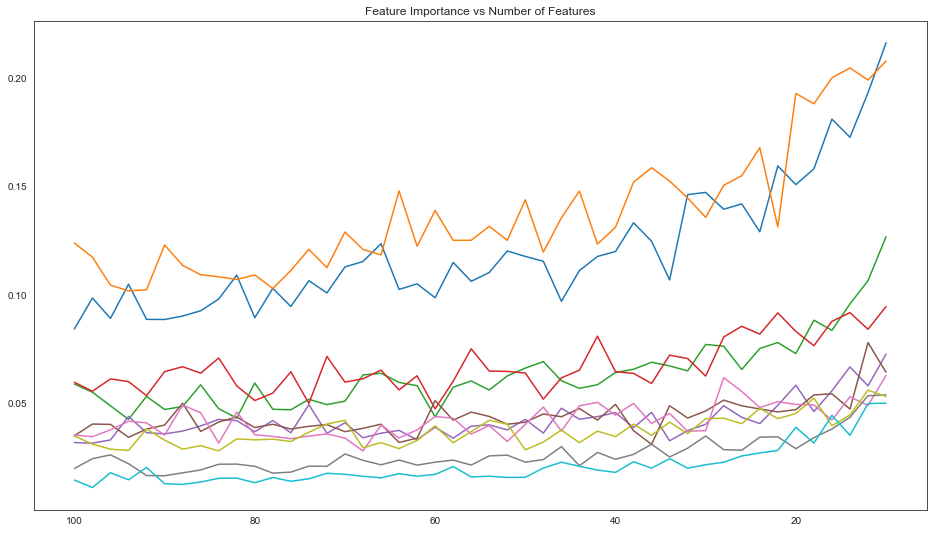

In [13]:
fs.plot_feature_performance(feat_stats, topk=10)

KeyError: 'best_estimator'

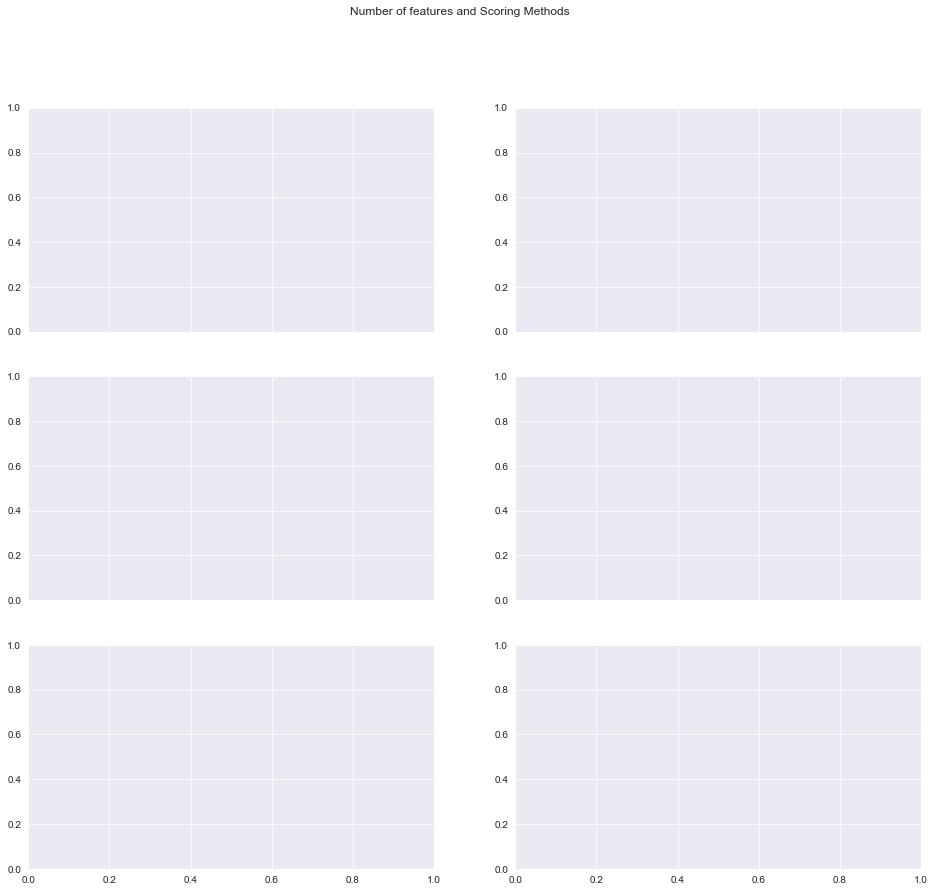

In [15]:
fs.plot_metrics_check(results)